# DEB model plots for the PCSE

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from scalebar import scale_bar #Imported code from the internet

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
cname = 'Tan'
mat = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\Test.mat'.format(cname))
mat2 = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\DEBmatrix_mean.mat'.format(cname))
mat_std1 = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\std_Li_corr.mat'.format(cname))
mat_std2 = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\std_rB_corr.mat'.format(cname))

mat_p = scipy.io.loadmat(r'C:\Users\{}\Dropbox\DEBtool\Perna_perna\P_coefficient.mat'.format(cname))

In [3]:
#r_B = np.array(mat['r_B'])
lat = np.array(mat['latCHL']).ravel()
lon = np.array(mat['lonCHL']).ravel()

L_i_mean = np.array(mat2['L_i'])
L_i_corr = np.array(mat2['L_i_corr'])
r_B_mean = np.array(mat2['r_B'])
r_B_mean_corr = np.array(mat2['r_B_corr'])

std_li = np.array(mat_std1['std_Li_corr'])
std_rb = np.array(mat_std2['std_rB_corr'])

P = np.array(mat_p['P'])

In [5]:
lonmin = lon.min()
lonmax = lon.max()
latmin = lat.min()
latmax = lat.max()
deltalon = lonmax - lonmin
deltalat = latmax - latmin

In [6]:
[lonmin, latmin, lonmax, latmax]

[-51.679176330566406,
 -29.929147720336914,
 -39.600826263427734,
 -20.920852661132812]

In [5]:
arquivo = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces')
parser = shpreader.Reader(arquivo)

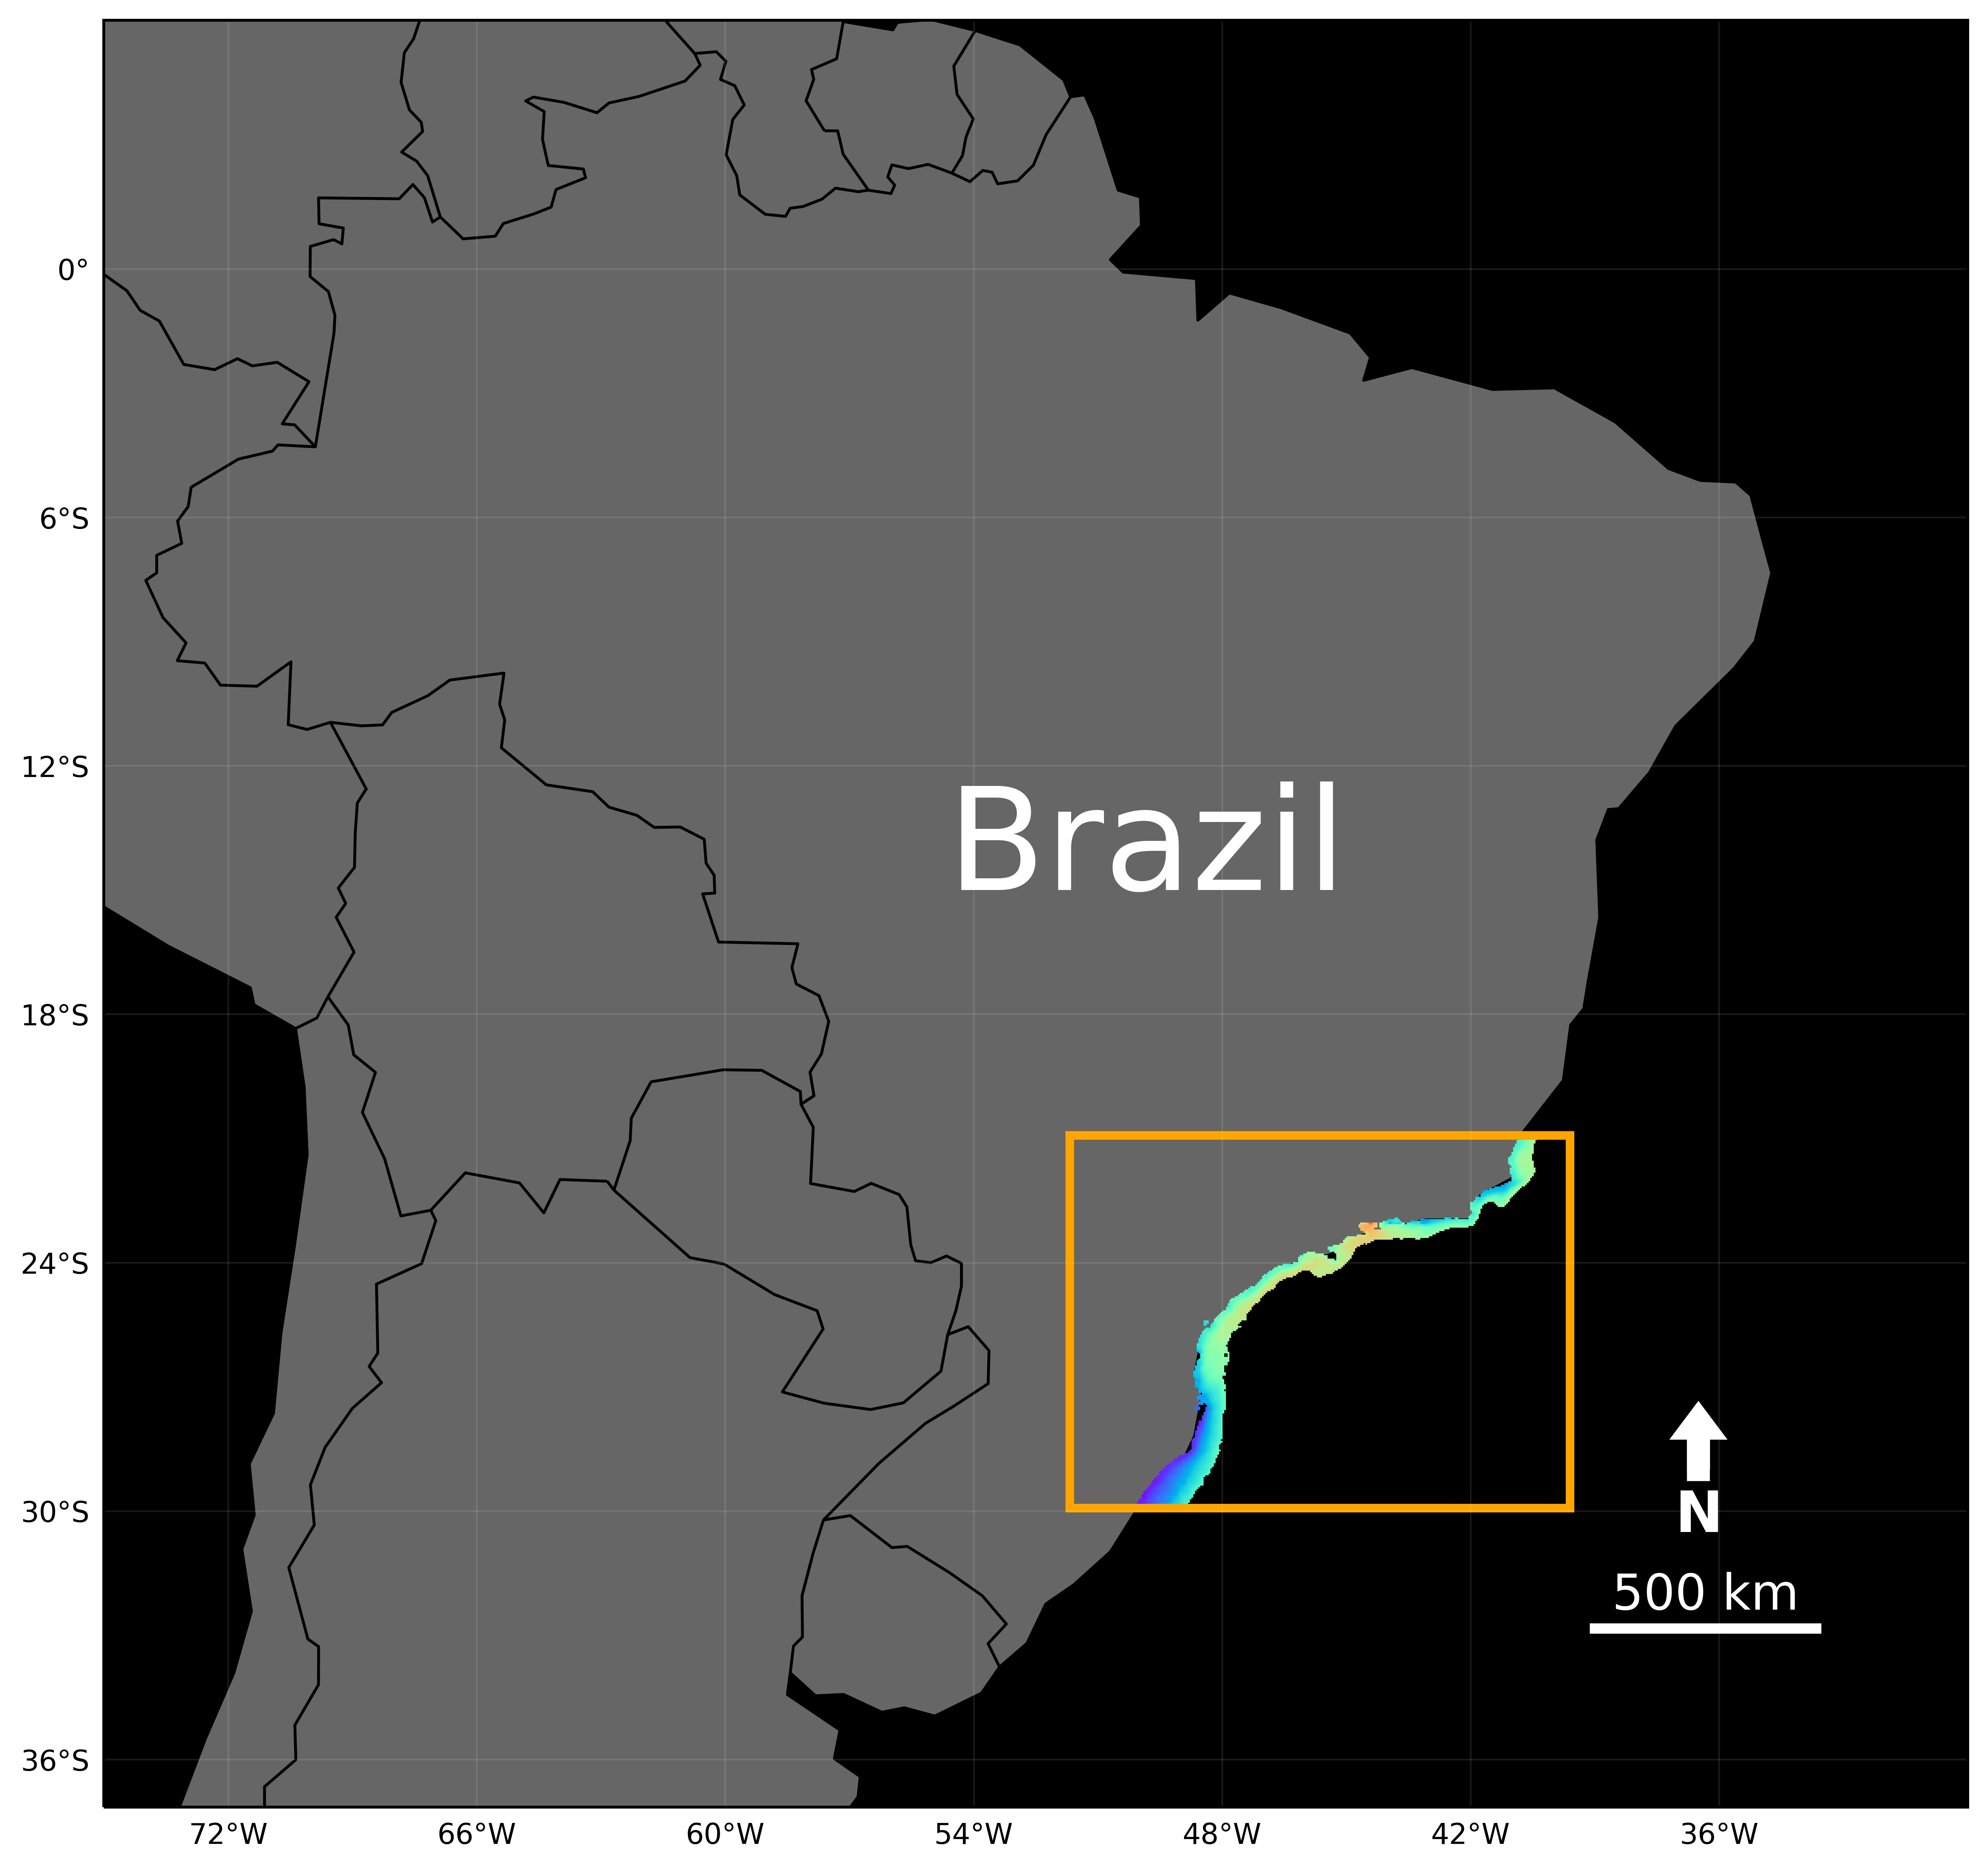

In [10]:
#Study site Brazil
paises = parser.records()
fig=plt.figure(figsize=(10, 10), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())

extent = [-75, -30, 6, -35]
ax.set_extent(extent)

gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='white', alpha=0.1)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.add_feature(cfeature.OCEAN, facecolor = 'k')#'darkblue', alpha=.3)
ax.add_feature(cfeature.LAND, facecolor = 'k', alpha=.6)
ax.add_feature(cfeature.BORDERS)

plt.imshow(r_B_mean, cmap = 'rainbow', extent = (min(lon), max(lon), min(lat), max(lat)), 
           vmin=0.0023150968055078982, vmax=0.004467200519169916, transform=ccrs.PlateCarree())

#Add country label
plt.text(-45, -15, 'Brazil', horizontalalignment='right', transform=ccrs.PlateCarree(), fontsize=50, color='white')

#Add rectangle
rect = patches.Rectangle((lonmin,latmin),deltalon,deltalat,linewidth=3,edgecolor='orange',facecolor='none')
ax.add_patch(rect) 

# Set scale bar (using scalebar.py, not cartopy)
text_kwargs = dict(size='xx-large')
plot_kwargs = dict(linewidth=3.6)
scale_bar(ax, (0.8, 0.1), 500, text_kwargs=text_kwargs, plot_kwargs=plot_kwargs, color='white')

# North arrow
plt.arrow(-36.5, -29, 0, 1, linewidth=8, head_width=0.3, head_length=0.2, 
          fc='white', ec='white', transform=ccrs.PlateCarree())
plt.text(-35.9, -30.5, 'N', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         fontsize = 20, weight='bold', color='white')

fig.canvas.draw()
plt.tight_layout(pad=2)

#plt.savefig('plt_PCSE_Studysite', dpi = 600)

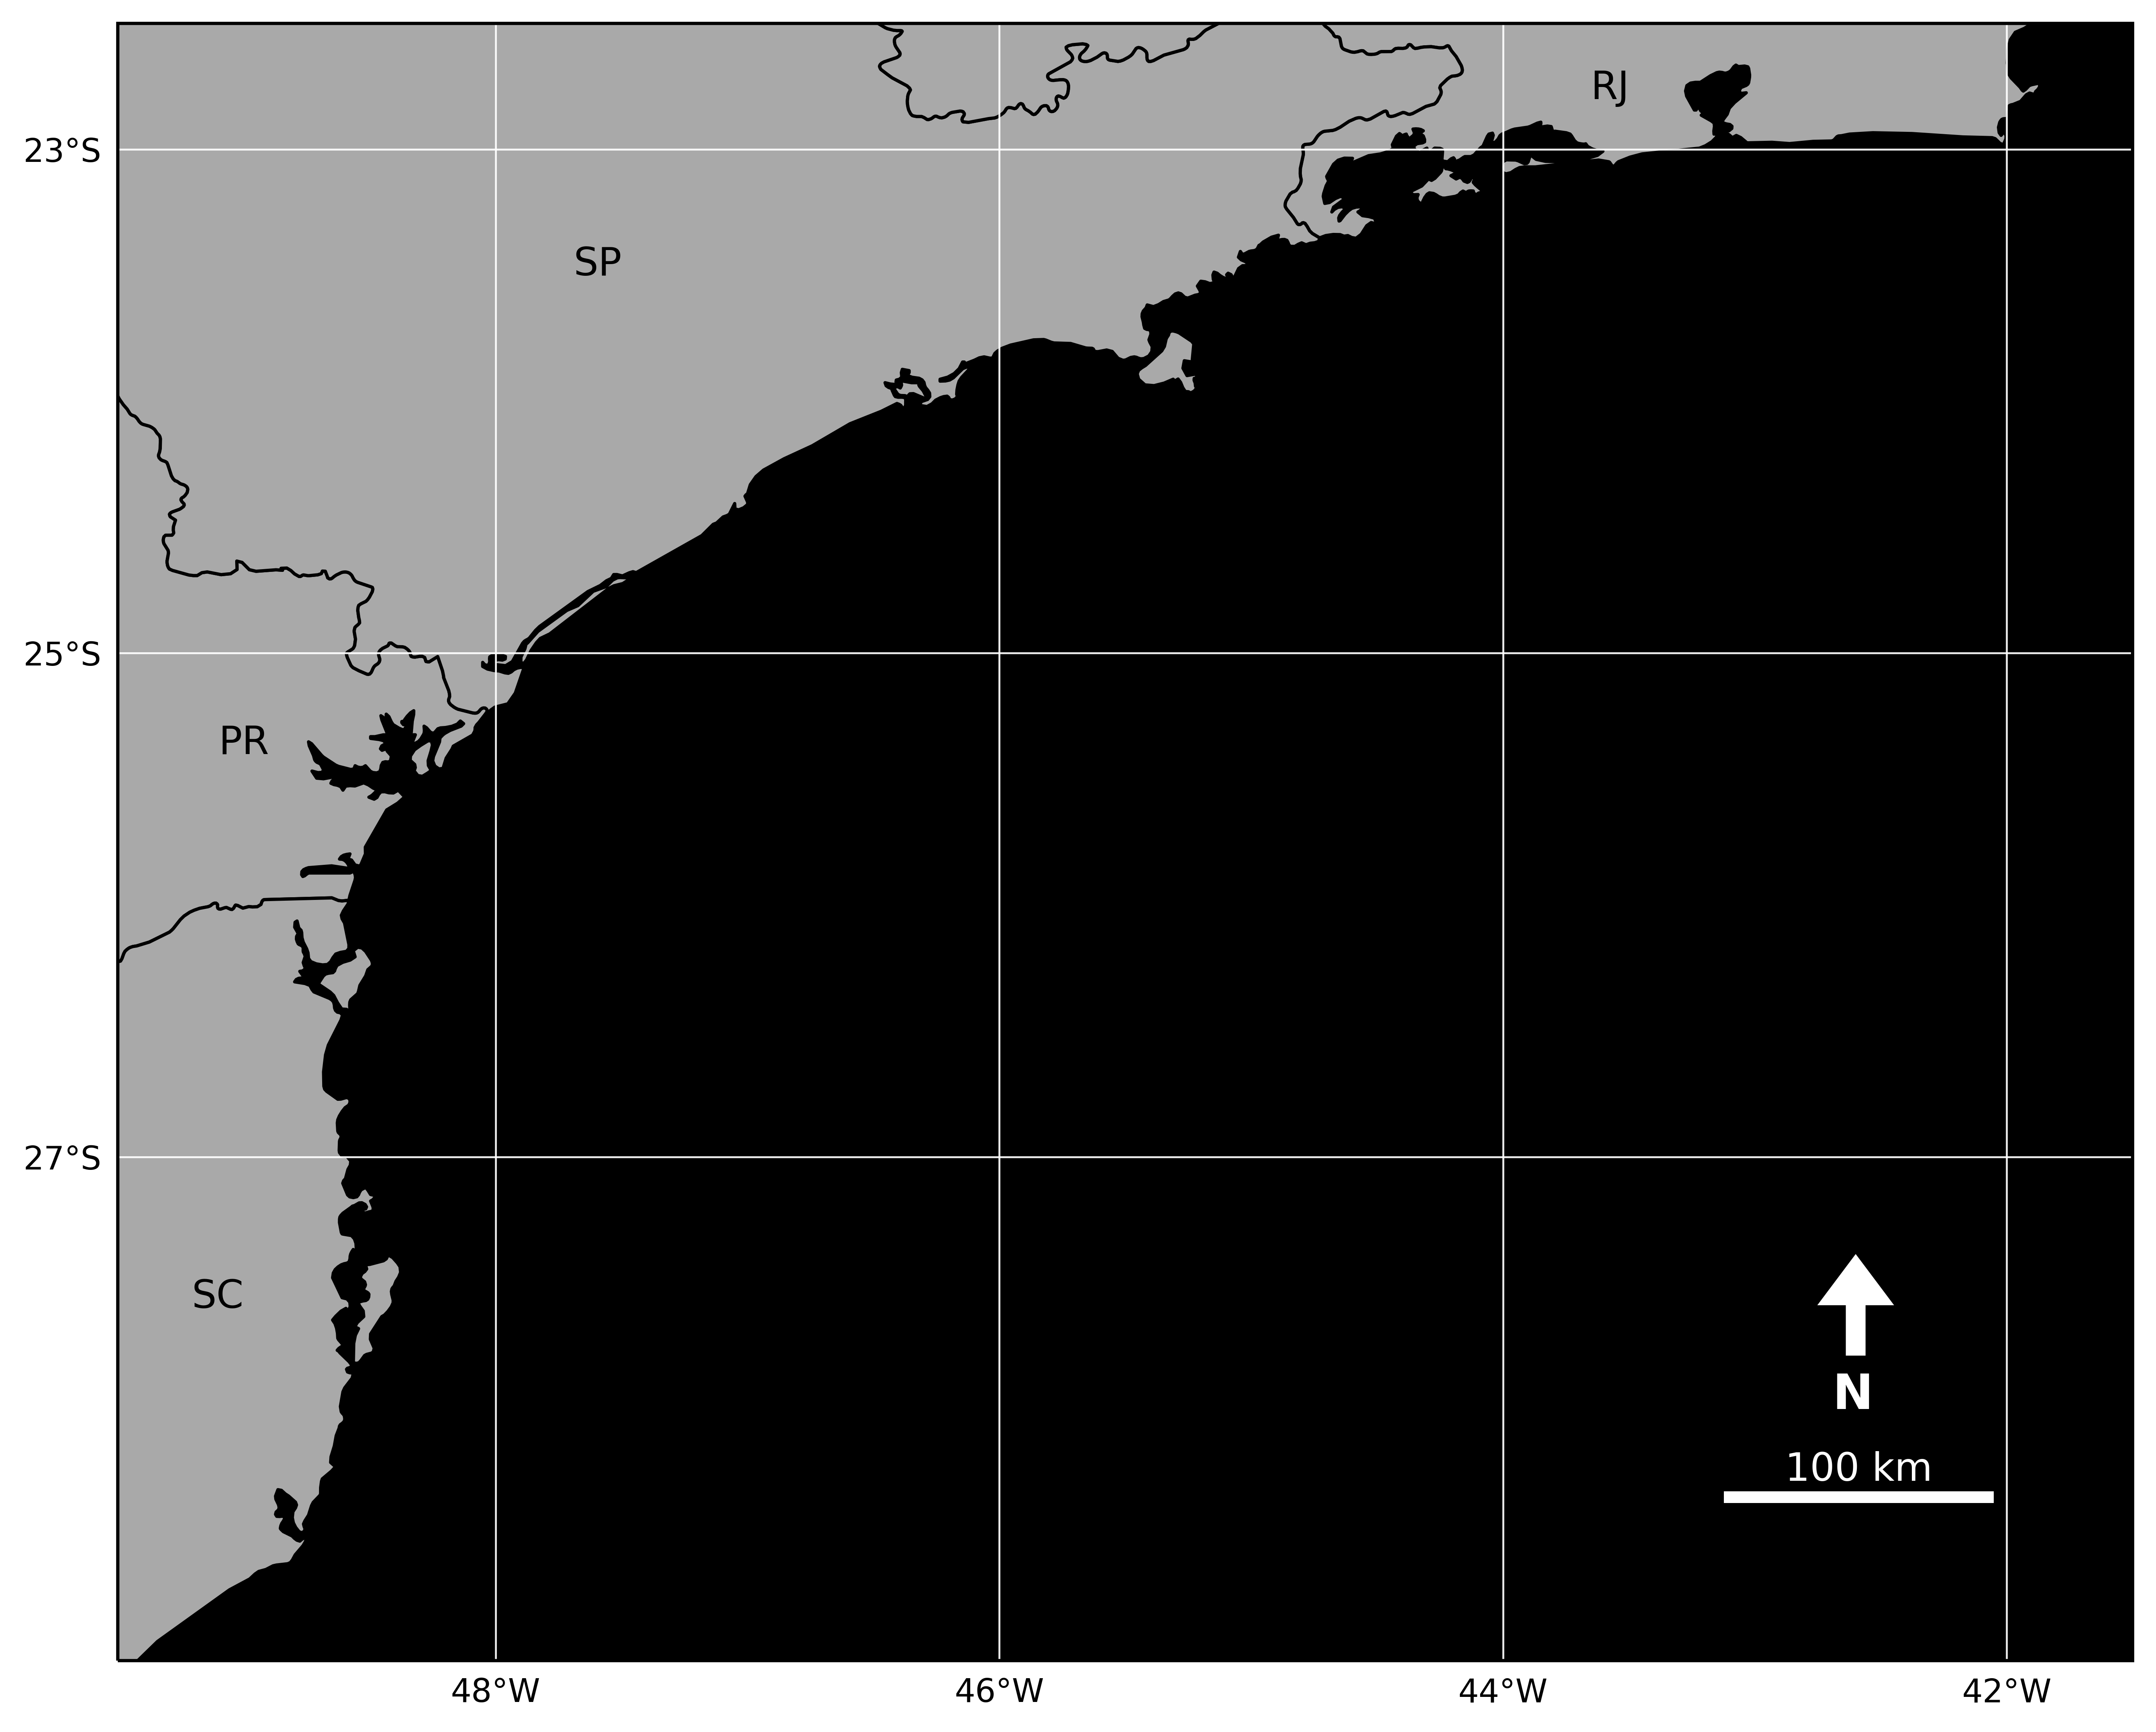

In [7]:
#Study site PCSE
paises = parser.records()
fig=plt.figure(figsize=(10, 10), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor = 'k')#, alpha=.8)
ax.add_feature(cfeature.LAND, facecolor = 'k')#, alpha=.8)

extent = [-49.5, -41.5, -29, -22.5]
ax.set_extent(extent)

for estado in paises:
    if estado.attributes['admin'] == 'Brazil':        
        ax.add_geometries([estado.geometry], ccrs.PlateCarree(), facecolor='darkgray', edgecolor='k')
        

# Setting up gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='white', alpha=0.9)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-52, -50, -48, -46, -44, -42, -40, -38])
gl.ylocator = mticker.FixedLocator([-21, -23, -25, -27, -29, -31])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# State name labels
plt.text(-43.5, -22.8, 'RJ', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-47.5, -23.5, 'SP', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-48.9, -25.4, 'PR', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-49, -27.6, 'SC', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')

# Set scale bar (using scalebar.py, not cartopy)
text_kwargs = dict(size='large')
plot_kwargs = dict(linewidth=3.6)
scale_bar(ax, (0.8, 0.1), 100, text_kwargs=text_kwargs, plot_kwargs=plot_kwargs, color='white')

# North arrow
plt.arrow(-42.6, -27.75, 0, 0.2, linewidth=6, head_width=0.15, head_length=0.1, 
          fc='white', ec='white', transform=ccrs.PlateCarree())
plt.text(-42.53, -28, 'N', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         fontsize = 15, weight='bold', color='white')

fig.canvas.draw()
plt.tight_layout(pad=3.55)
    
#plt.savefig('plt_PCSE_Studysite_zoomed', dpi = 600)

## Mean 2002-2018 Growth Rate

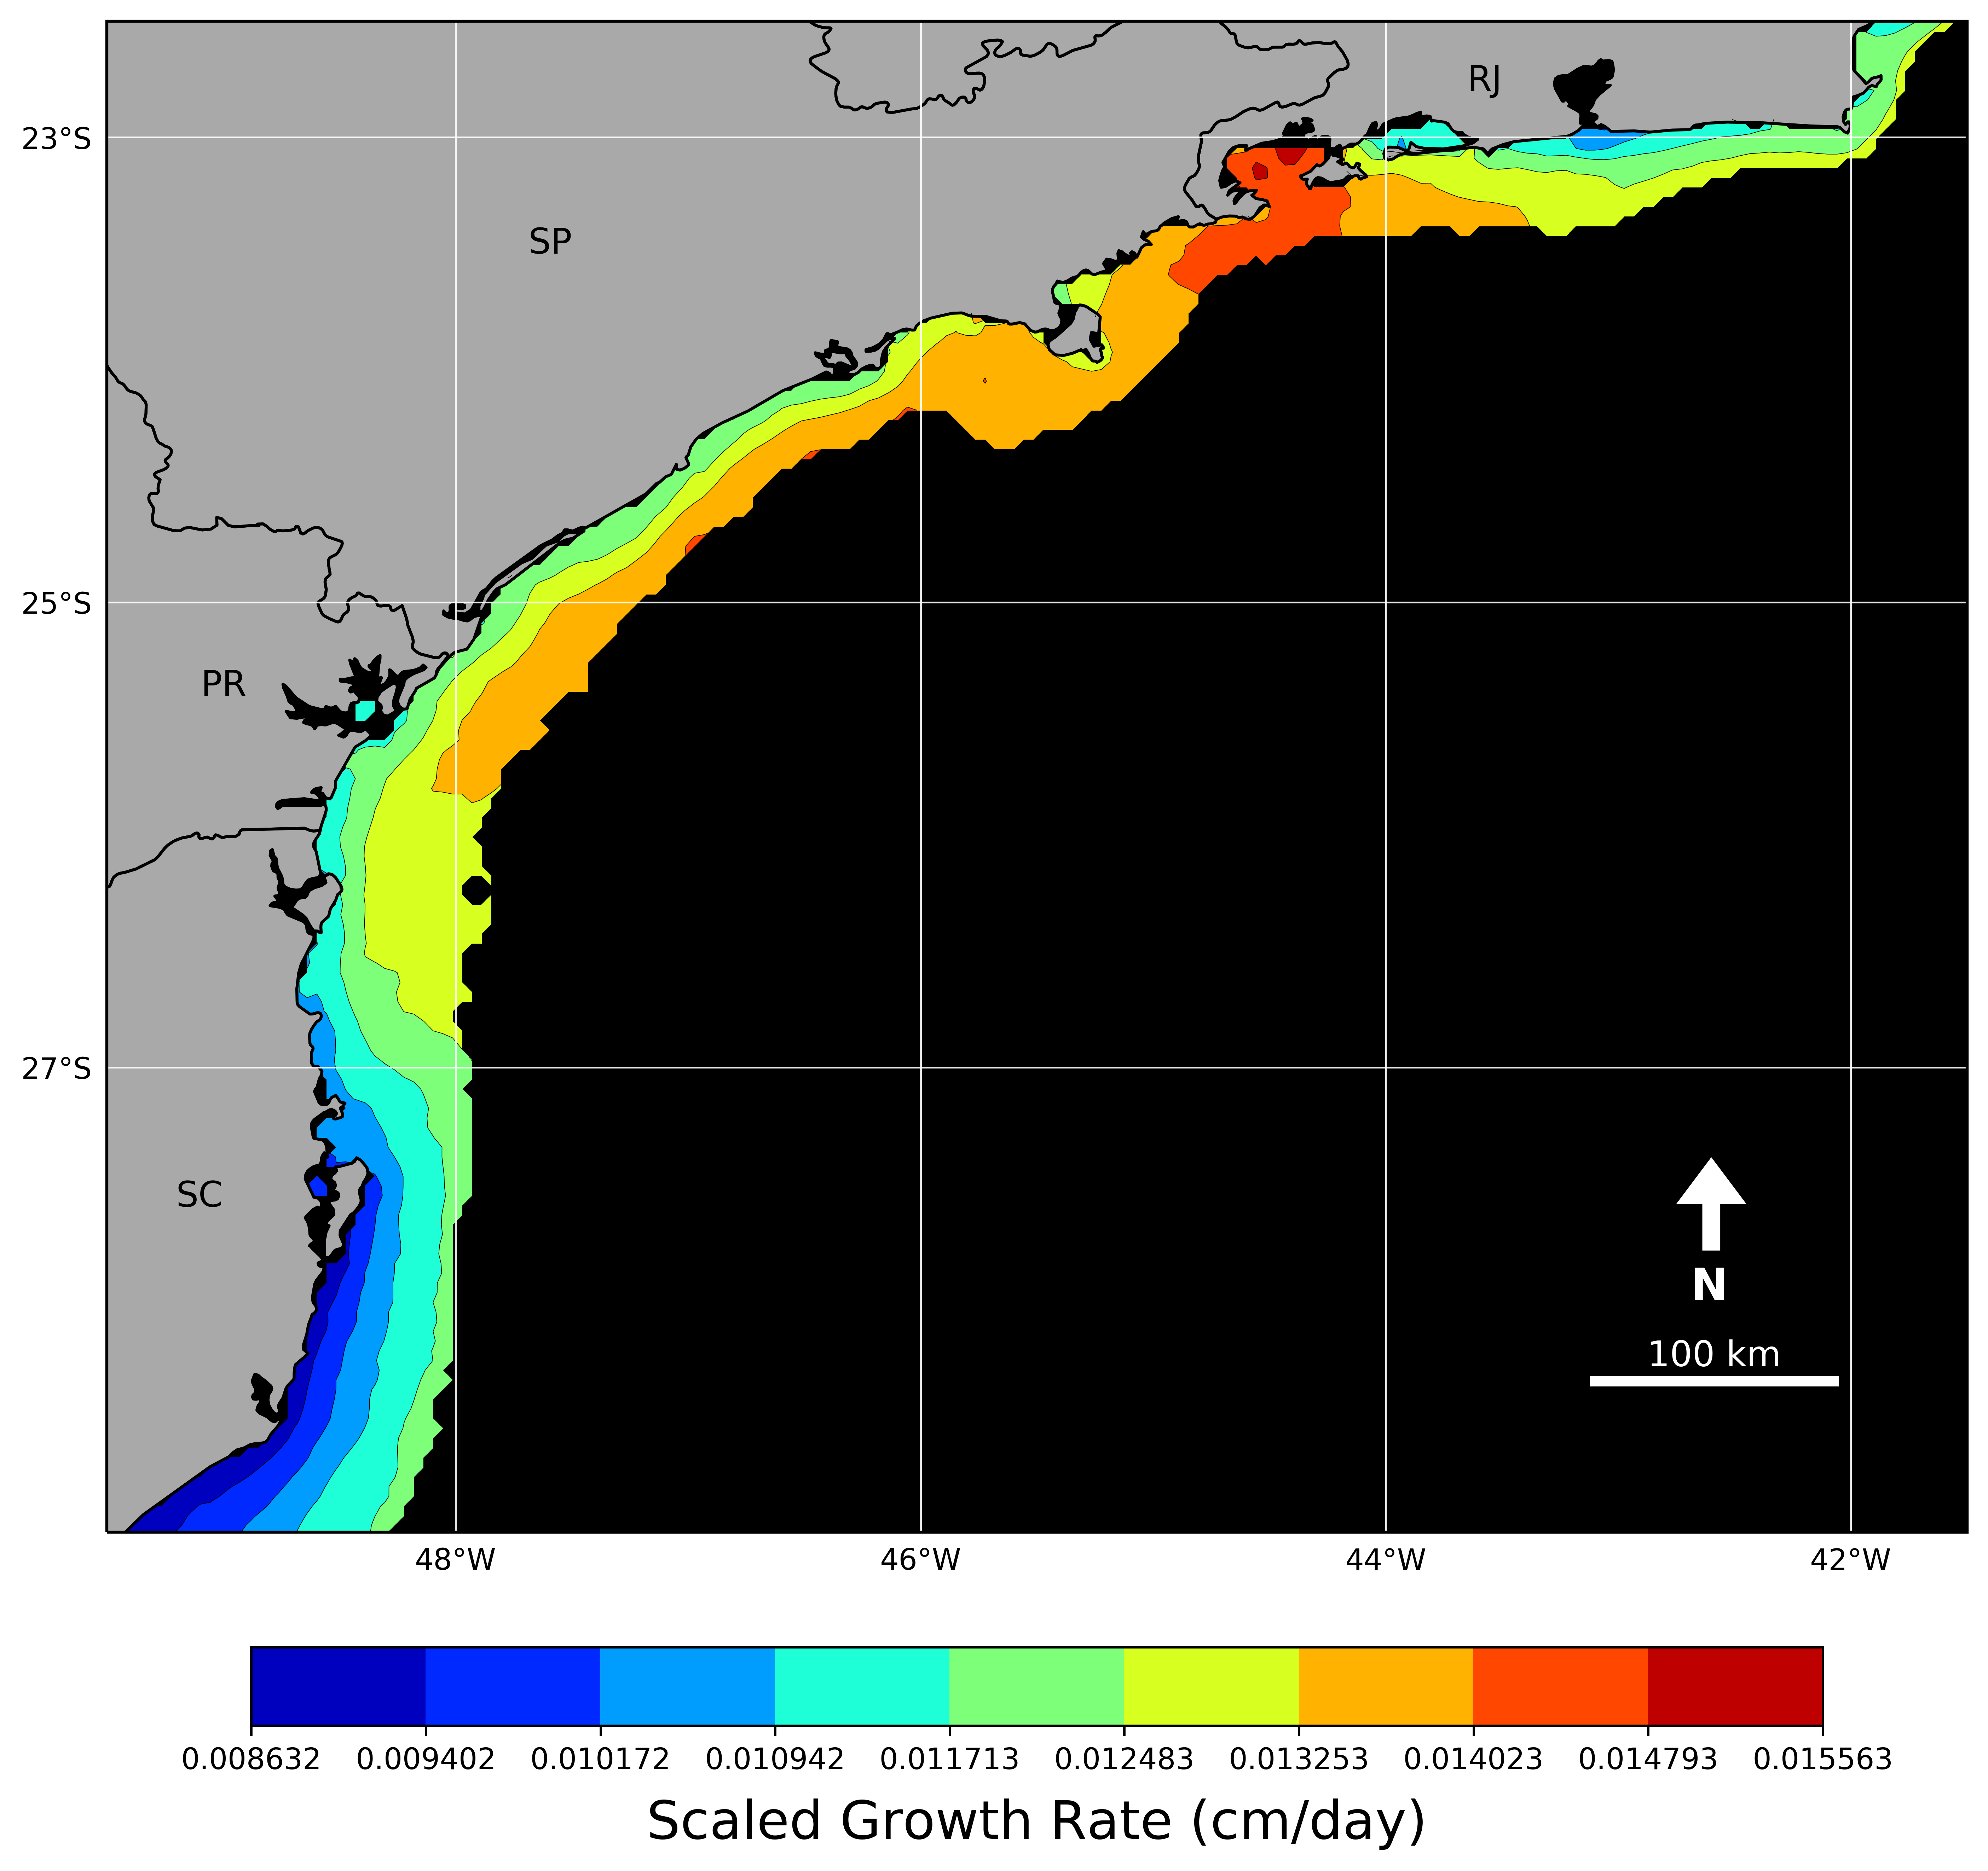

In [60]:
paises = parser.records()
fig=plt.figure(figsize=(10, 10), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor = 'k')#, alpha=.8)
ax.add_feature(cfeature.LAND, facecolor = 'k')#, alpha=.8)

extent = [-49.5, -41.5, -29, -22.5]
ax.set_extent(extent)

for estado in paises:
    if estado.attributes['admin'] == 'Brazil':        
        ax.add_geometries([estado.geometry], ccrs.PlateCarree(), facecolor='darkgray', edgecolor='k')
        
rb_max = max(r_B_mean_corr[~np.isnan(r_B_mean_corr)])
rb_min = min(r_B_mean_corr[~np.isnan(r_B_mean_corr)])
vmin, vmax = rb_min, rb_max
levels = np.linspace(vmin,vmax,10)            
plt.contourf(lon, lat, r_B_mean_corr, cmap = 'jet',
             vmin=vmin, vmax=vmax, levels=levels, transform=ccrs.PlateCarree())

#cbaxes = inset_axes(ax, width="4%", height="60%",height="60%", loc=4)
cbar = plt.colorbar(ax=ax, orientation="horizontal", shrink=.84, pad=.06)
cbar.set_label('Scaled Growth Rate (cm/day)', fontsize = 18, labelpad = 8)

plt.contour(lon, lat, r_B_mean_corr, colors='k', levels=levels, transform=ccrs.PlateCarree(), linewidths=0.2)

# Setting up gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='white', alpha=0.9)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-52, -50, -48, -46, -44, -42, -40, -38])
gl.ylocator = mticker.FixedLocator([-21, -23, -25, -27, -29, -31])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# State name labels
plt.text(-43.5, -22.8, 'RJ', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-47.5, -23.5, 'SP', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-48.9, -25.4, 'PR', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-49, -27.6, 'SC', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')

# Set scale bar (using scalebar.py, not cartopy)
text_kwargs = dict(size='large')
plot_kwargs = dict(linewidth=3.6)
scale_bar(ax, (0.8, 0.1), 100, text_kwargs=text_kwargs, plot_kwargs=plot_kwargs, color='white')

# North arrow
plt.arrow(-42.6, -27.75, 0, 0.2, linewidth=6, head_width=0.15, head_length=0.1, 
          fc='white', ec='white', transform=ccrs.PlateCarree())
plt.text(-42.53, -28, 'N', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         fontsize = 15, weight='bold', color='white')

fig.canvas.draw()
plt.tight_layout(pad=3.55)

#plt.savefig('plt_rB_PCSE_mean', dpi = 500)

## Mean 2002-2018 maximum structural size 

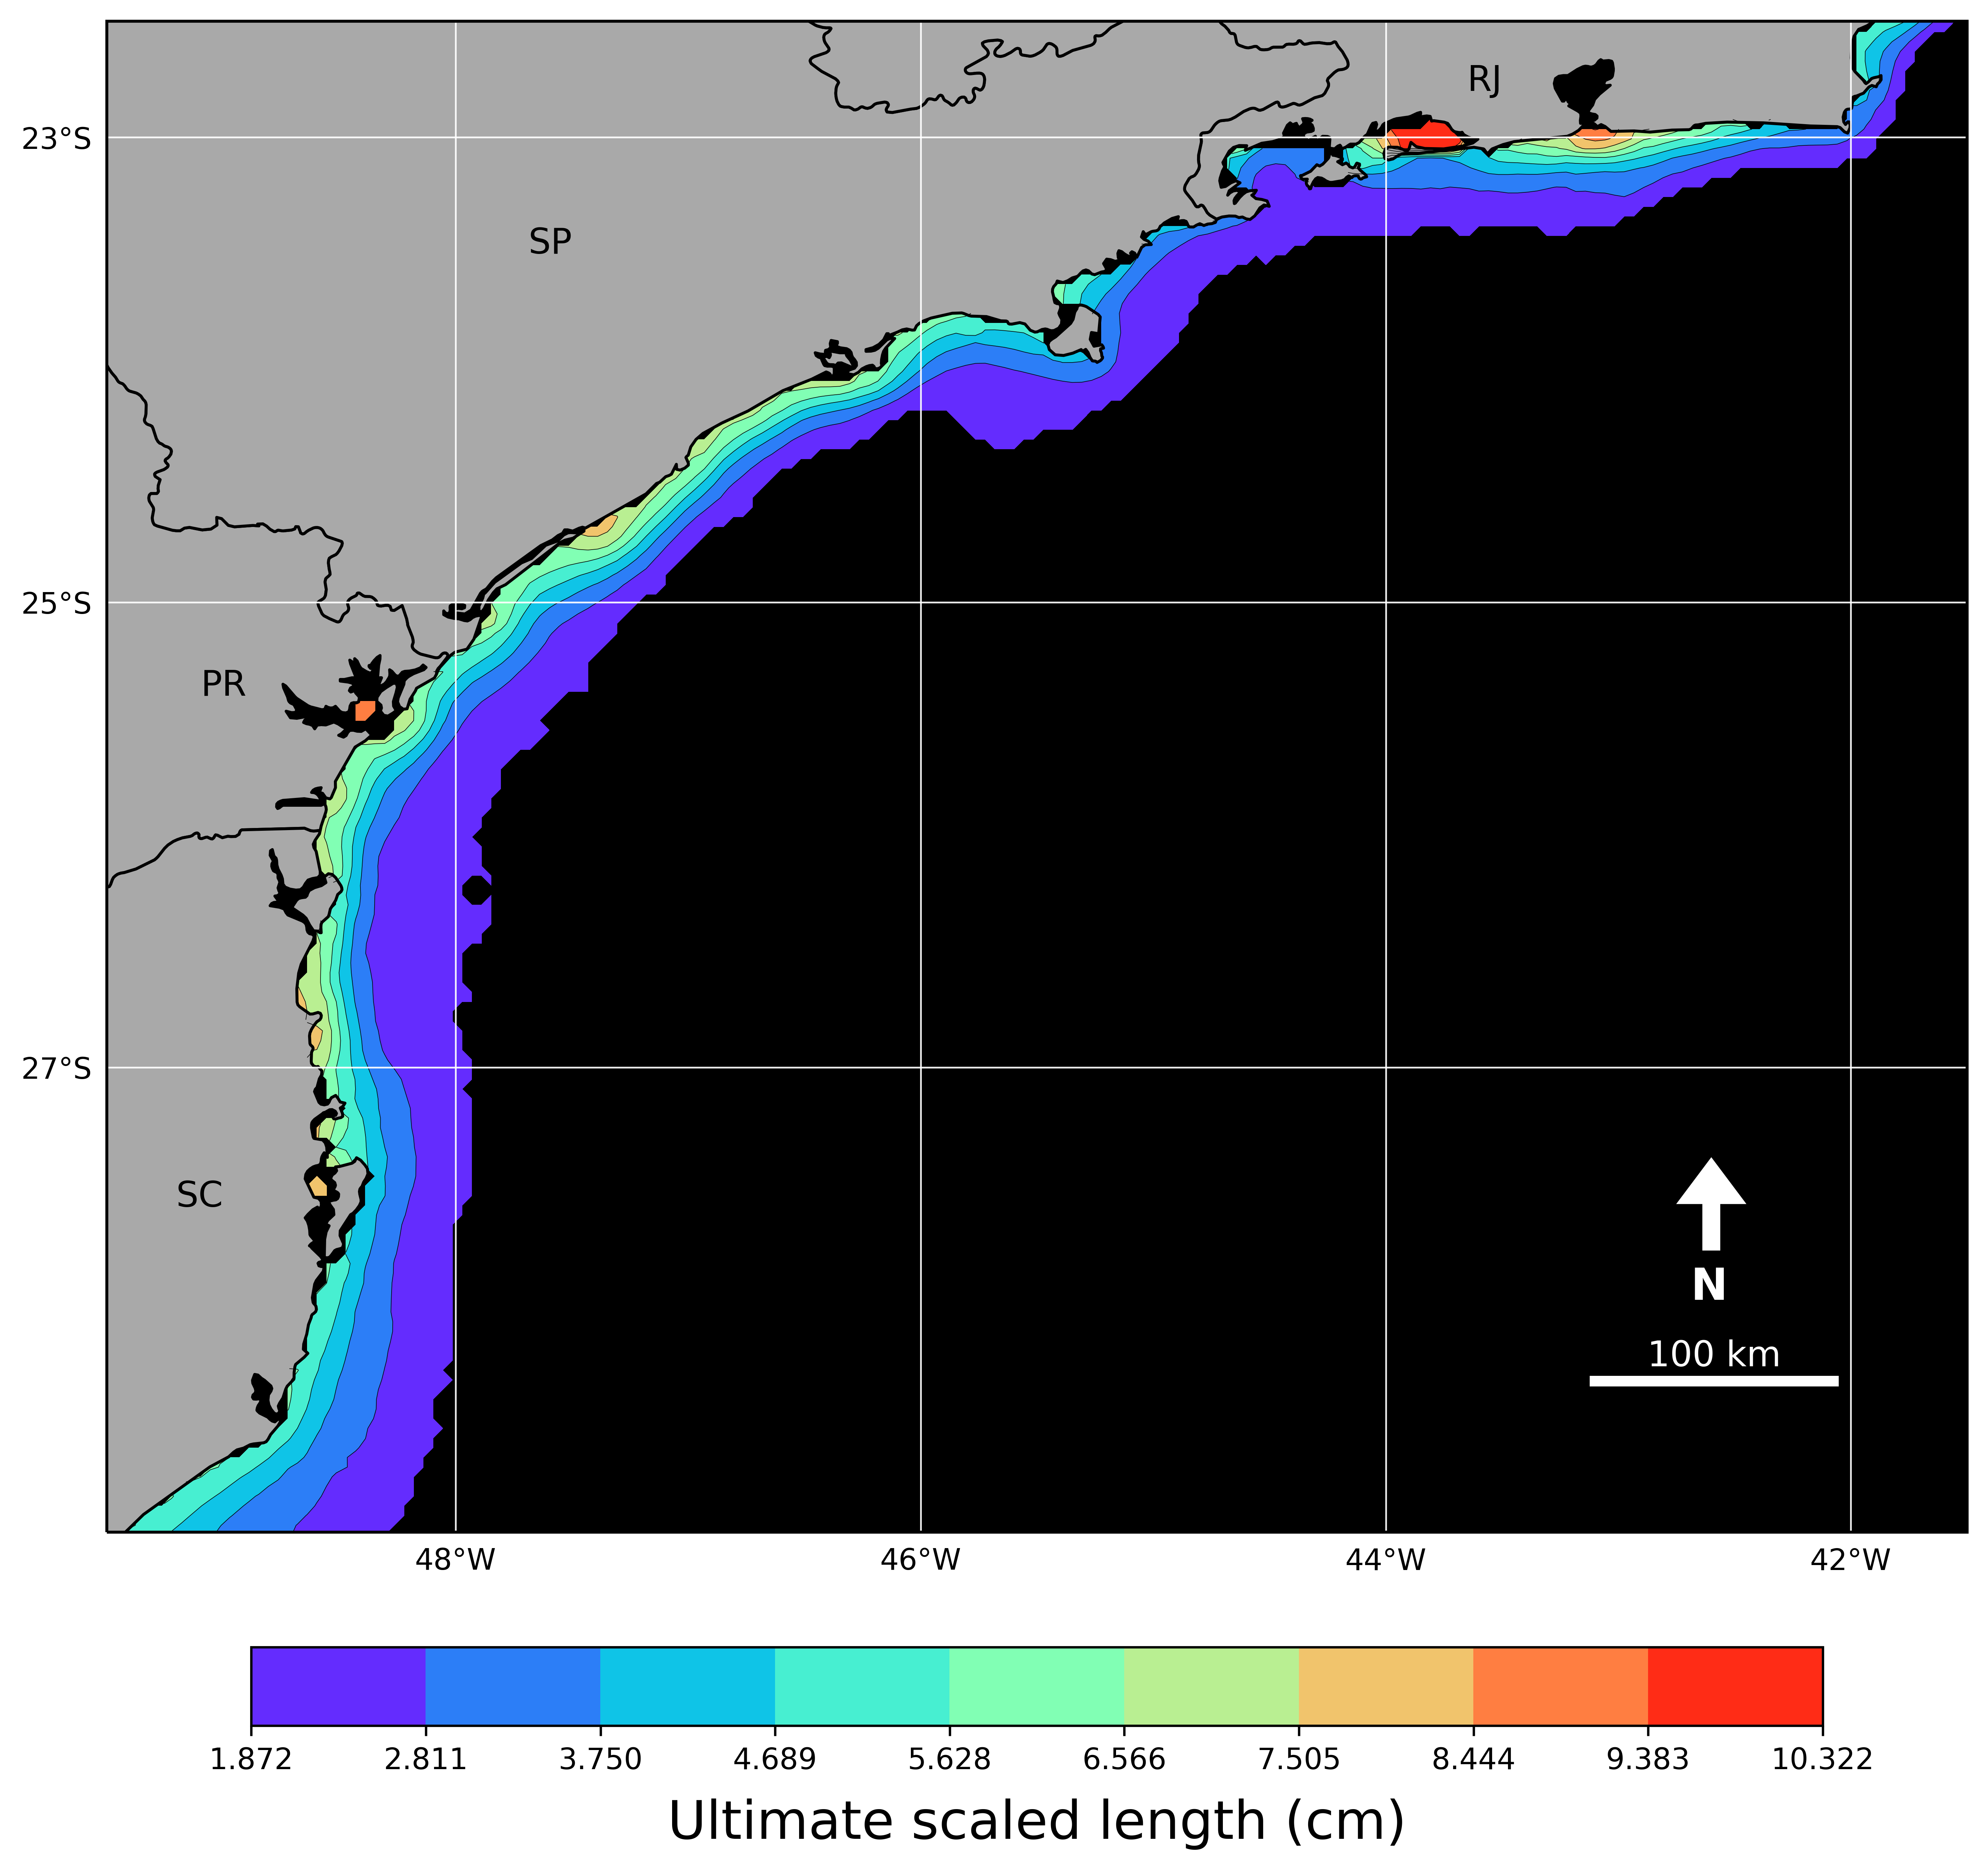

In [59]:
#L_i mean contourf for PCSE
paises = parser.records()
fig=plt.figure(figsize=(10, 10), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor = 'k')#, alpha=.8)
ax.add_feature(cfeature.LAND, facecolor = 'k')#, alpha=.8)

extent = [-49.5, -41.5, -29, -22.5]
ax.set_extent(extent)

for estado in paises:
    if estado.attributes['admin'] == 'Brazil':        
        ax.add_geometries([estado.geometry], ccrs.PlateCarree(), facecolor='darkgray', edgecolor='k')

#Plotting with corrected by shape coeficient values
li_max = max(L_i_corr[~np.isnan(L_i_corr)])
li_min = min(L_i_corr[~np.isnan(L_i_corr)])
vmin, vmax = li_min, li_max
levels = np.linspace(vmin,vmax,10)  
plt.contourf(lon, lat, L_i_corr, cmap = 'rainbow',
             vmin=vmin, vmax=vmax, levels=levels, transform=ccrs.PlateCarree())

#cbaxes = inset_axes(ax, width="4%", height="60%",height="60%", loc=4)
cbar = plt.colorbar(ax=ax, orientation="horizontal", shrink=.84, pad=.06)
cbar.set_label('Ultimate scaled length (cm)', fontsize = 18, labelpad = 8)

plt.contour(lon, lat, L_i_corr, colors='k', levels=levels, transform=ccrs.PlateCarree(), linewidths=0.2)

# Setting up gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='white', alpha=0.9)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-52, -50, -48, -46, -44, -42, -40, -38])
gl.ylocator = mticker.FixedLocator([-21, -23, -25, -27, -29, -31])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# State name labels
plt.text(-43.5, -22.8, 'RJ', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-47.5, -23.5, 'SP', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-48.9, -25.4, 'PR', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-49, -27.6, 'SC', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')

# Set scale bar (using scalebar.py, not cartopy)
text_kwargs = dict(size='large')
plot_kwargs = dict(linewidth=3.6)
scale_bar(ax, (0.8, 0.1), 100, text_kwargs=text_kwargs, plot_kwargs=plot_kwargs, color='white')

# North arrow
plt.arrow(-42.6, -27.75, 0, 0.2, linewidth=6, head_width=0.15, head_length=0.1, 
          fc='white', ec='white', transform=ccrs.PlateCarree())
plt.text(-42.53, -28, 'N', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         fontsize = 15, weight='bold', color='white')

fig.canvas.draw()
plt.tight_layout(pad=3.55)

#plt.savefig('plt_Li_PCSE_mean', dpi = 500)

## Productivity index (P)

In [ ]:
#ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

$ P = \frac{L_i r_B}{1+\left(\frac{std_{L_i}  std_{r_B}}{L_i  r_B}\right)}$

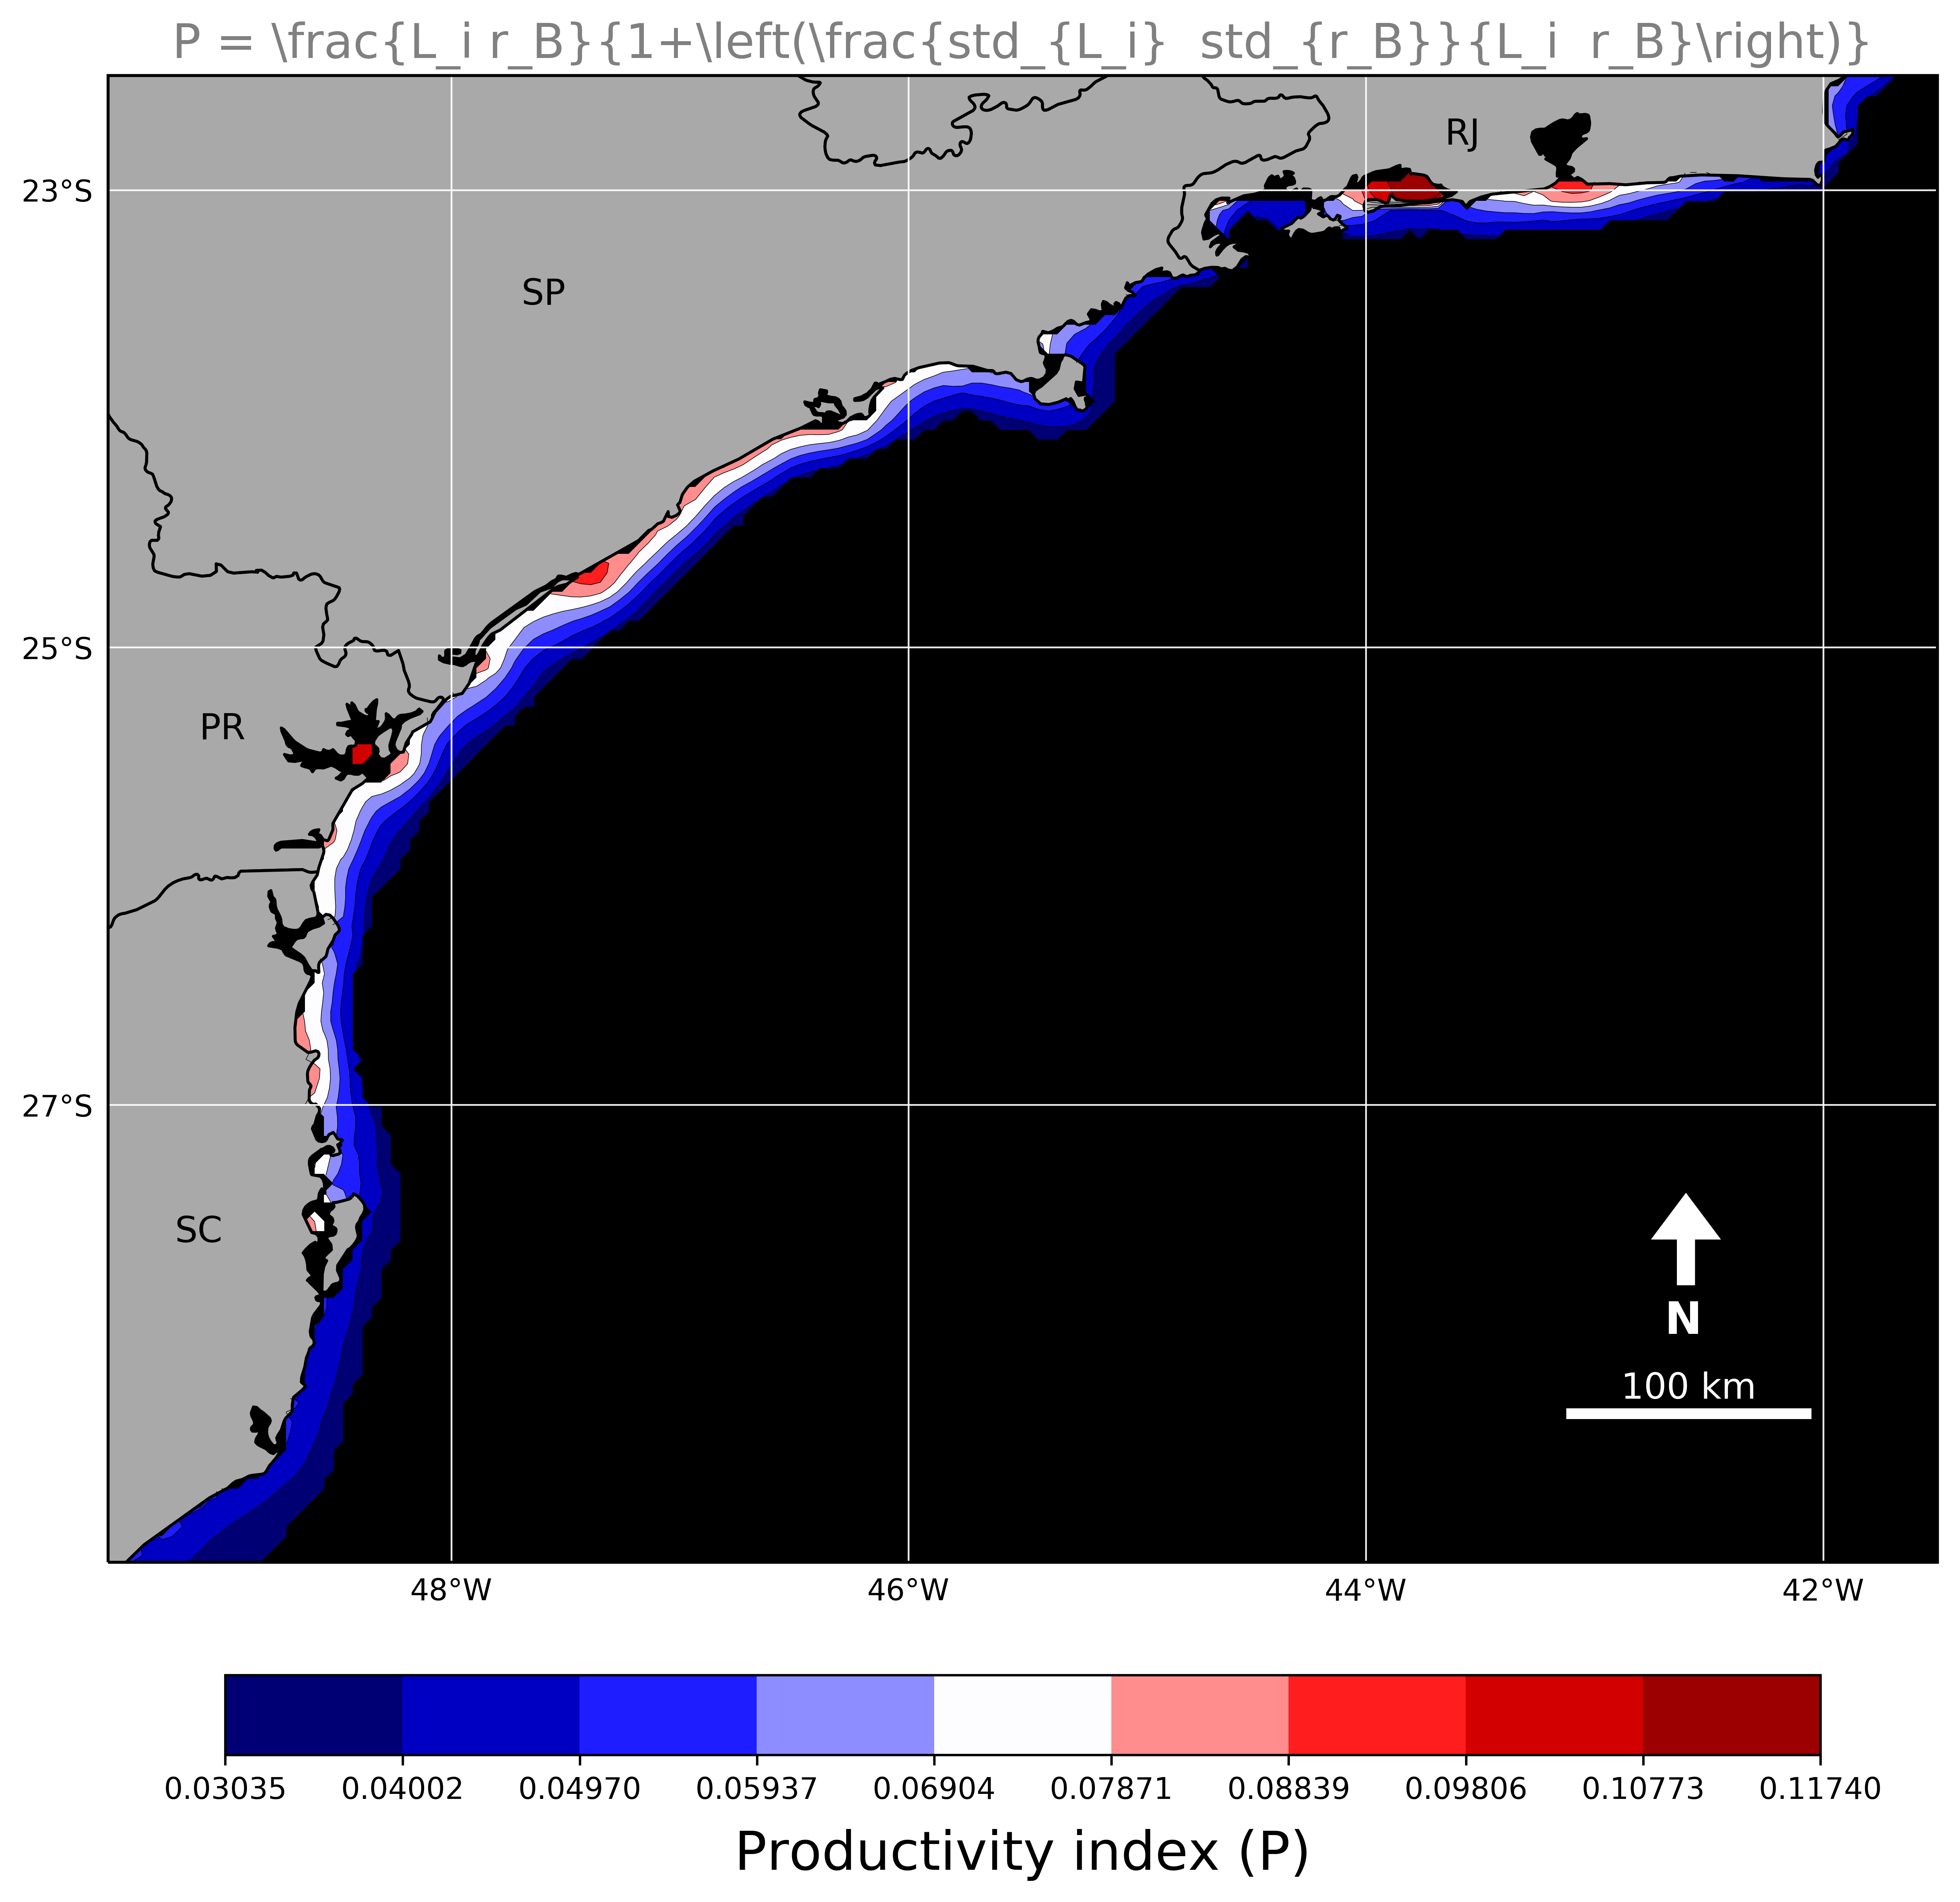

In [8]:
#Productivity index P for PCSE
paises = parser.records()
fig=plt.figure(figsize=(10, 10), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor = 'k')#, alpha=.8)
ax.add_feature(cfeature.LAND, facecolor = 'k')#, alpha=.8)

extent = [-49.5, -41.5, -29, -22.5]
ax.set_extent(extent)

for estado in paises:
    if estado.attributes['admin'] == 'Brazil':        
        ax.add_geometries([estado.geometry], ccrs.PlateCarree(), facecolor='darkgray', edgecolor='k')

#Plotting with corrected by shape coeficient values
P_max = max(P[~np.isnan(P)])
P_min = min(P[~np.isnan(P)])
vmin, vmax = P_min, P_max
levels = np.linspace(vmin,vmax,10)  
plt.contourf(lon, lat, P, cmap = 'seismic',
             vmin=vmin, vmax=vmax,levels=levels, transform=ccrs.PlateCarree())  

#cbaxes = inset_axes(ax, width="4%", height="60%",height="60%", loc=4)
cbar = plt.colorbar(ax=ax, orientation="horizontal", shrink=.84, pad=.06)
cbar.set_label('Productivity index (P)', fontsize = 18, labelpad = 8)

plt.contour(lon, lat, P, colors='k', levels=levels, transform=ccrs.PlateCarree(), linewidths=0.2)

# Setting up gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='white', alpha=0.9)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-52, -50, -48, -46, -44, -42, -40, -38])
gl.ylocator = mticker.FixedLocator([-21, -23, -25, -27, -29, -31])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# State name labels
plt.text(-43.5, -22.8, 'RJ', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-47.5, -23.5, 'SP', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-48.9, -25.4, 'PR', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-49, -27.6, 'SC', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')

# Set scale bar (using scalebar.py, not cartopy)
text_kwargs = dict(size='large')
plot_kwargs = dict(linewidth=3.6)
scale_bar(ax, (0.8, 0.1), 100, text_kwargs=text_kwargs, plot_kwargs=plot_kwargs, color='white')

# North arrow
plt.arrow(-42.6, -27.75, 0, 0.2, linewidth=6, head_width=0.15, head_length=0.1, 
          fc='white', ec='white', transform=ccrs.PlateCarree())
plt.text(-42.53, -28, 'N', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         fontsize = 15, weight='bold', color='white')

fig.canvas.draw()
plt.tight_layout(pad=3.55)

#plt.savefig('plt_P_PCSE', dpi = 500)

In [ ]:
paises = parser.records()
fig=plt.figure(figsize=(10, 10), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor = 'k')#, alpha=.8)
ax.add_feature(cfeature.LAND, facecolor = 'k')#, alpha=.8)

extent = [-49.5, -41.5, -29, -22.5]
ax.set_extent(extent)

for estado in paises:
    if estado.attributes['admin'] == 'Brazil':        
        ax.add_geometries([estado.geometry], ccrs.PlateCarree(), facecolor='darkgray', edgecolor='k')
            
plt.imshow(r_B_mean, cmap = 'rainbow', extent = (min(lon), max(lon), min(lat), max(lat)), 
           vmin=0.0023150968055078982, vmax=0.004467200519169916, transform=ccrs.PlateCarree())
#cbaxes = inset_axes(ax, width="4%", height="60%",height="60%", loc=4)
cbar = plt.colorbar(ax=ax, orientation="horizontal", shrink=.84, pad=.06)
cbar.set_label('Von Bertalanffy Growth Rate (cm/day)', fontsize = 18, labelpad = 8)

# Setting up gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.6, color='white', alpha=0.9)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-52, -50, -48, -46, -44, -42, -40, -38])
gl.ylocator = mticker.FixedLocator([-21, -23, -25, -27, -29, -31])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# State name labels
plt.text(-43.5, -22.8, 'RJ', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-47.5, -23.5, 'SP', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-48.9, -25.4, 'PR', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')
plt.text(-49, -27.6, 'SC', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         size='large', color='k')

# Set scale bar (using scalebar.py, not cartopy)
text_kwargs = dict(size='large')
plot_kwargs = dict(linewidth=3.6)
scale_bar(ax, (0.8, 0.1), 100, text_kwargs=text_kwargs, plot_kwargs=plot_kwargs, color='white')

# North arrow
plt.arrow(-42.6, -27.75, 0, 0.2, linewidth=6, head_width=0.15, head_length=0.1, 
          fc='white', ec='white', transform=ccrs.PlateCarree())
plt.text(-42.53, -28, 'N', horizontalalignment='right', transform=ccrs.PlateCarree(), 
         fontsize = 15, weight='bold', color='white')

fig.canvas.draw()
plt.tight_layout(pad=3.55)

#plt.savefig('plt_rB_pixel_PCSE', dpi = 500)

In [ ]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=r_B)

In [ ]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=r_B_mean)

In [ ]:
sns.set(style="whitegrid")
sns.violinplot(x=r_B_mean)
sns.violinplot(x=r_B, color='orange')

In [1]:
sns.distplot(r_B_mean_corr[~np.isnan(r_B_mean_corr)])
sns.distplot(r_B_mean_corr[~np.isnan(L_i_corr)])

NameError: name 'sns' is not defined